In [2]:
import pandas as pd
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Use IterativeImputer (advanced machine learning imputation)
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_imputed['Cluster'] = kmeans.fit_predict(df_scaled)

print(df_imputed.head())


    Feature1   Feature2   Feature3   Feature4   Feature5   Feature6  \
0  50.428605  53.444583  53.756946   1.856071   3.521235  49.137008   
1   2.472636  44.036458  53.592829  61.975131  10.732875  54.718898   
2   3.304423  42.965076  39.589020  30.363368  85.749174  86.312326   
3  99.358349  57.322667  44.709451  73.114672  50.538420  98.142469   
4   5.320020  38.447518  10.157480  20.521748  50.675831  60.608624   

    Feature7     Target  Cluster  
0  29.732654  32.645740        2  
1  34.874381  95.470401        2  
2  29.114039  22.605991        0  
3  50.316911  57.650773        0  
4  56.061490  20.711467        0  


In [3]:
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Use IterativeImputer (ML-based imputation)
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_imputed['Cluster'] = kmeans.fit_predict(df_scaled)

# Compute Silhouette Score (Higher is better: range -1 to 1)
silhouette_avg = silhouette_score(df_scaled, df_imputed['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.0809


In [4]:
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# If the dataset contains categorical columns, drop or encode them

# Use IterativeImputer (ML-based imputation)
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_imputed['Cluster'] = kmeans.fit_predict(df_scaled)

# Compute Silhouette Score (Convert to %)
silhouette_avg = silhouette_score(df_scaled, df_imputed['Cluster'])
silhouette_accuracy = (silhouette_avg + 1) / 2 * 100  # Convert to 0-100%

print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# If ground truth labels exist (e.g., column "actual_class")
if 'actual_class' in df.columns:
    ari_score = adjusted_rand_score(df['actual_class'], df_imputed['Cluster']) * 100
    print(f"Adjusted Rand Index (ARI) Accuracy: {ari_score:.2f}%")


Silhouette Score Accuracy: 54.05%


<Figure size 1200x600 with 0 Axes>

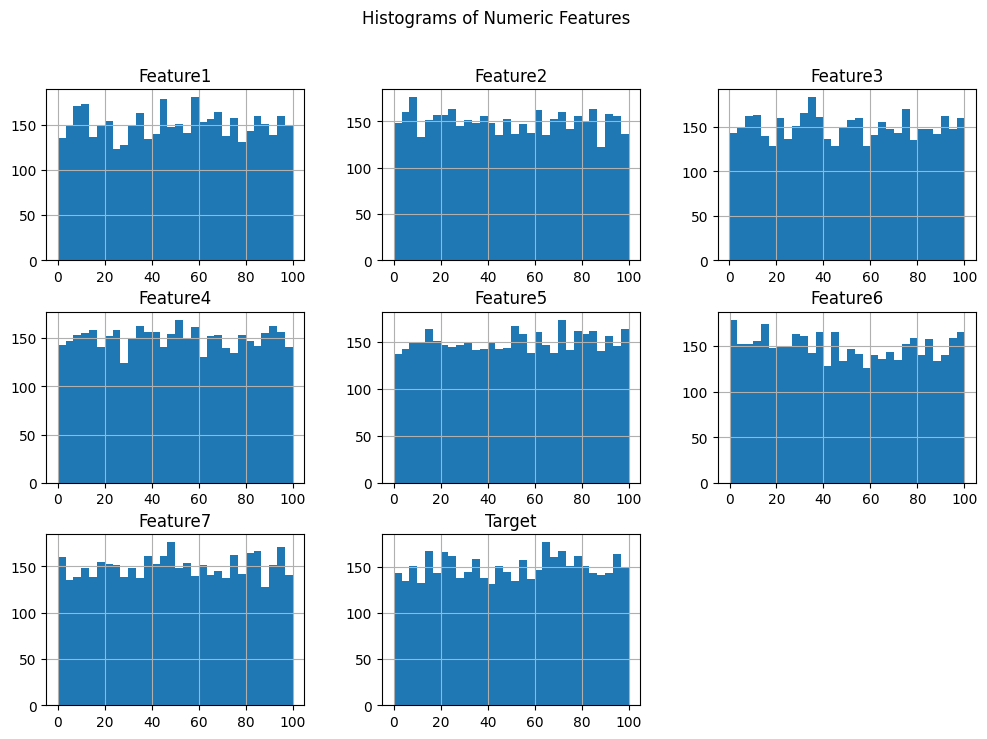

<Figure size 1000x500 with 0 Axes>

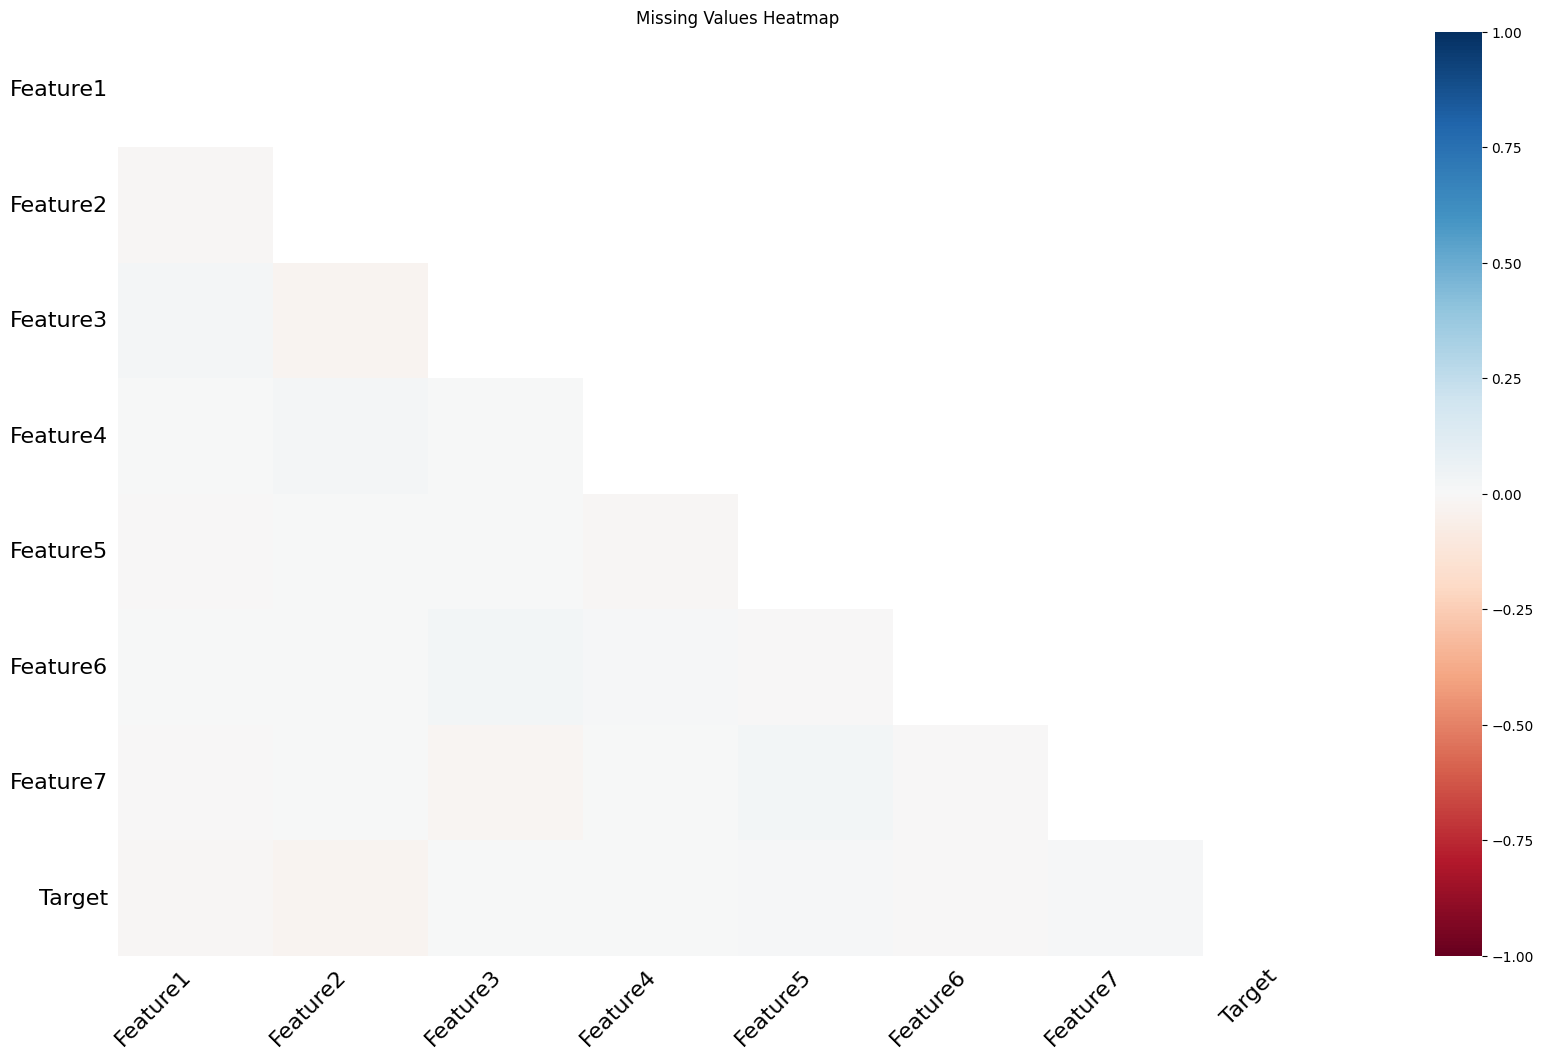

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


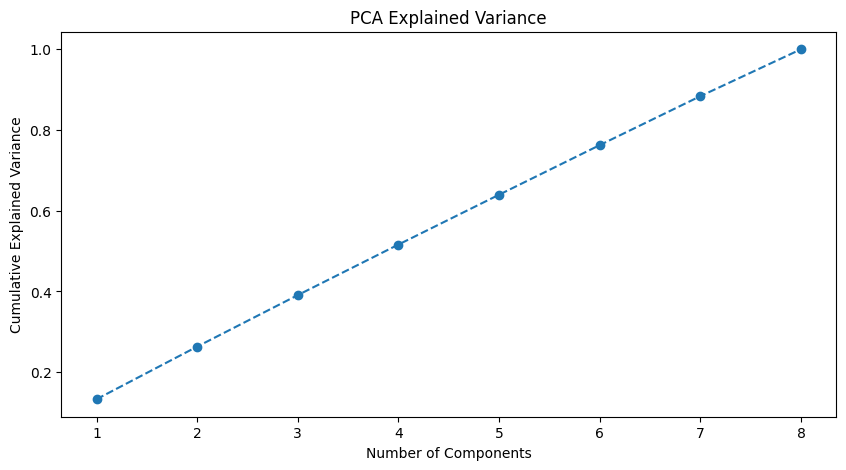

Silhouette Score Accuracy: 51.83%


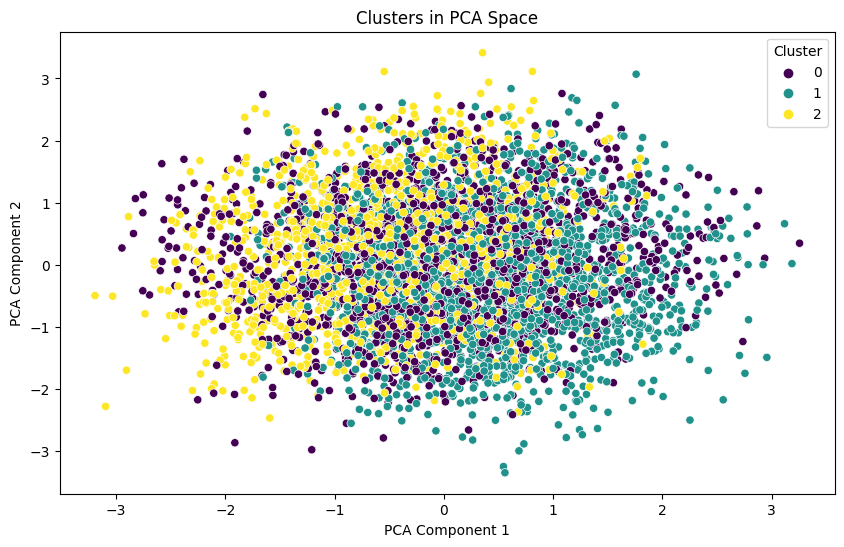

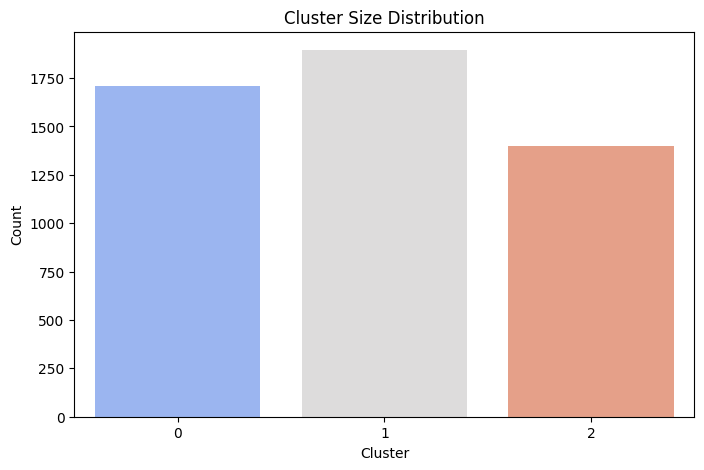

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import missingno as msno

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Data distribution visualization
plt.figure(figsize=(12, 6))
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Missing values heatmap
plt.figure(figsize=(10, 5))
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()

# One-Hot Encoding for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical and encoded categorical data
df_final = pd.concat([df[num_cols], df_encoded], axis=1)

# Impute missing values using Iterative Imputer
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA (reduce noise)
pca = PCA(n_components=0.95)  # Keep 95% variance
df_pca = pca.fit_transform(df_scaled)

# PCA Explained Variance Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Use Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)
df_imputed['Cluster'] = clustering.fit_predict(df_pca)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_pca, df_imputed['Cluster'])
silhouette_accuracy = (silhouette_avg + 1) / 2 * 100
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# Cluster Visualization (First 2 PCA Components)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_imputed['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

# Cluster Size Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_imputed['Cluster'], palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# If ground truth labels exist
if 'actual_class' in df.columns:
    ari_score = adjusted_rand_score(df['actual_class'], df_imputed['Cluster']) * 100
    print(f"Adjusted Rand Index (ARI) Accuracy: {ari_score:.2f}%")


In [7]:
# Calculate silhouette score accuracy
silhouette_avg = silhouette_score(df_pca, df_imputed['Cluster'])
silhouette_accuracy = (silhouette_avg + 1) / 2 * 100
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# If ground truth labels exist, calculate ARI accuracy
if 'actual_class' in df.columns:
    ari_score = adjusted_rand_score(df['actual_class'], df_imputed['Cluster']) * 100
    print(f"Adjusted Rand Index (ARI) Accuracy: {ari_score:.2f}%")
else:
    print("No actual_class column found. ARI Accuracy cannot be computed.")


Silhouette Score Accuracy: 51.83%
No actual_class column found. ARI Accuracy cannot be computed.


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Agglomerative Silhouette Score: 0.04
KMeans Silhouette Score: 0.08
Best Clustering Method: KMeans
Silhouette Score Accuracy: 54.05%


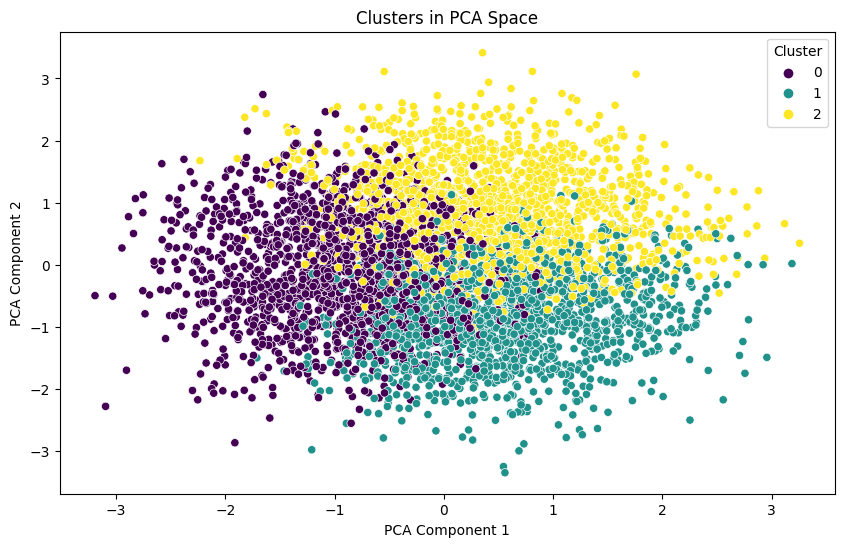

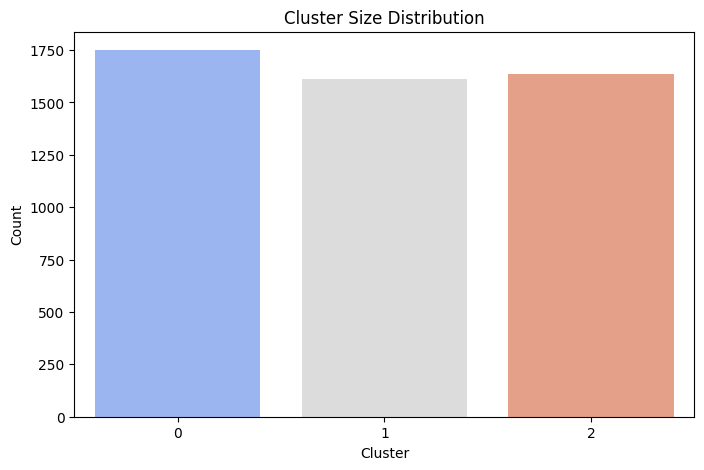

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import missingno as msno

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# One-Hot Encoding for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical and encoded categorical data
df_final = pd.concat([df[num_cols], df_encoded], axis=1)

# Impute missing values using Iterative Imputer
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA (reduce noise)
pca = PCA(n_components=0.95)  # Keep 95% variance
df_pca = pca.fit_transform(df_scaled)

# Try different clustering algorithms and compare silhouette scores
clustering_models = {
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5)
}

best_model = None
best_score = -1
best_labels = None

for name, model in clustering_models.items():
    labels = model.fit_predict(df_pca)
    if len(set(labels)) > 1:  # Avoid silhouette score errors
        score = silhouette_score(df_pca, labels)
        print(f"{name} Silhouette Score: {score:.2f}")
        if score > best_score:
            best_score = score
            best_model = name
            best_labels = labels

# Assign best cluster labels
df_imputed['Cluster'] = best_labels

# Display best clustering method and accuracy
silhouette_accuracy = (best_score + 1) / 2 * 100
print(f"Best Clustering Method: {best_model}")
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# Cluster Visualization (First 2 PCA Components)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_imputed['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

# Cluster Size Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_imputed['Cluster'], palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:499: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(distances, out=distances)


KMeans Silhouette Score: 0.09
DBSCAN Silhouette Score: -0.39
GMM Silhouette Score: 0.08
Best Clustering Method: KMeans
Silhouette Score Accuracy: 54.32%


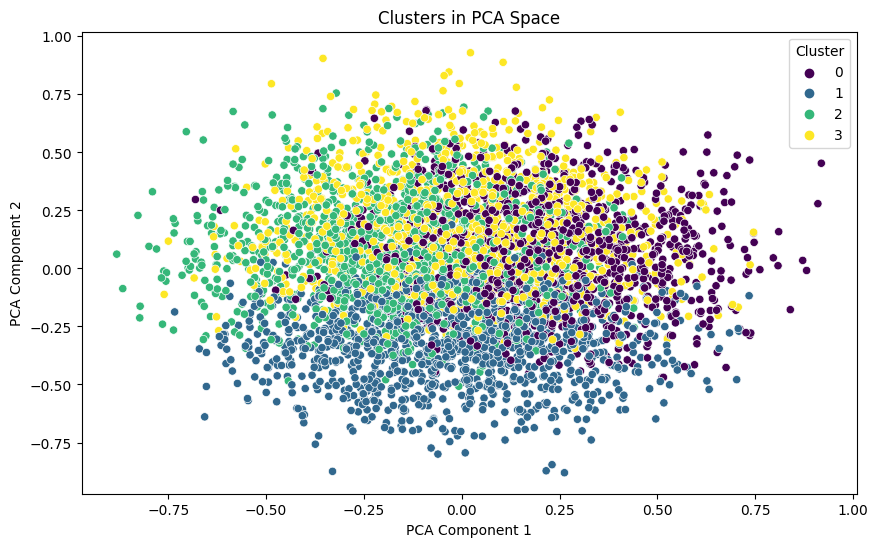

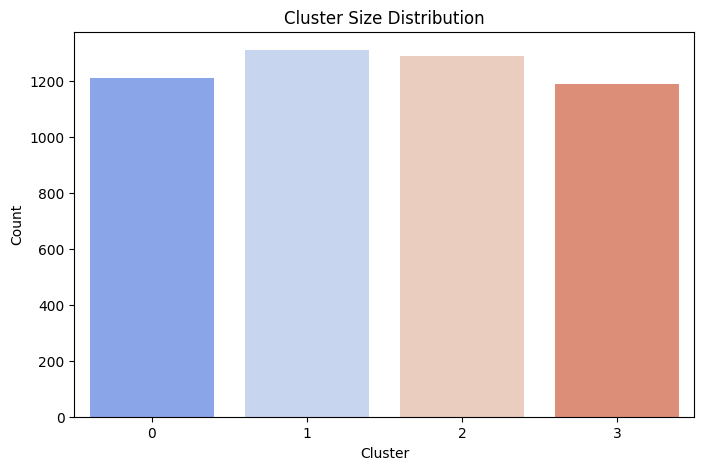

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical and encoded categorical data
df_final = pd.concat([df[num_cols], df_encoded], axis=1)

# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Normalize data before PCA
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA (Reduce dimensions while preserving variance)
pca = PCA(n_components=0.98)  # Keep 98% variance
df_pca = pca.fit_transform(df_scaled)

# Tune Clustering Algorithms
clustering_models = {
    "KMeans": KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=42, n_init=10),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=6),
    "GMM": GaussianMixture(n_components=4, covariance_type='full', random_state=42)
}

best_model = None
best_score = -1
best_labels = None

for name, model in clustering_models.items():
    labels = model.fit_predict(df_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        print(f"{name} Silhouette Score: {score:.2f}")
        if score > best_score:
            best_score = score
            best_model = name
            best_labels = labels

# Assign best cluster labels
df_imputed['Cluster'] = best_labels

# Print Best Model & Accuracy
silhouette_accuracy = (best_score + 1) / 2 * 100
print(f"Best Clustering Method: {best_model}")
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_imputed['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df_imputed['Cluster'], palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KMeans Silhouette Score: 0.08
GMM Silhouette Score: 0.06
Best Clustering Method: KMeans
Silhouette Score Accuracy: 54.19%


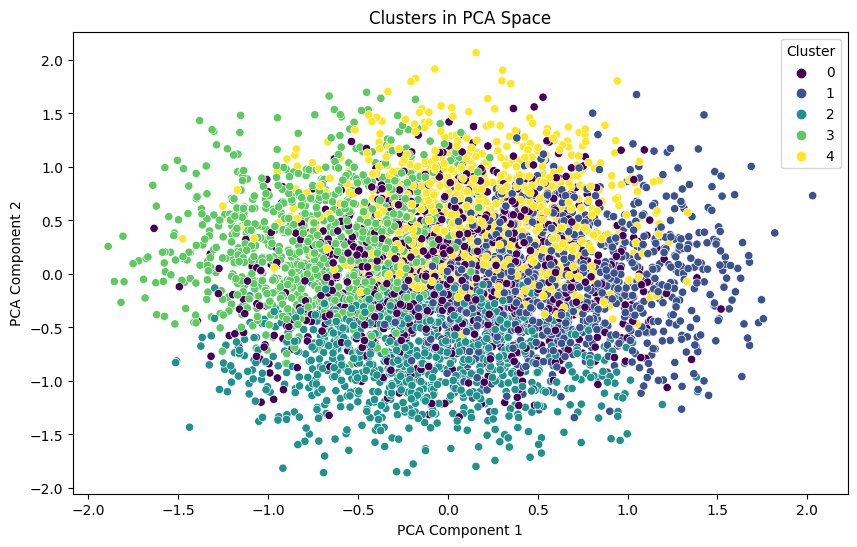

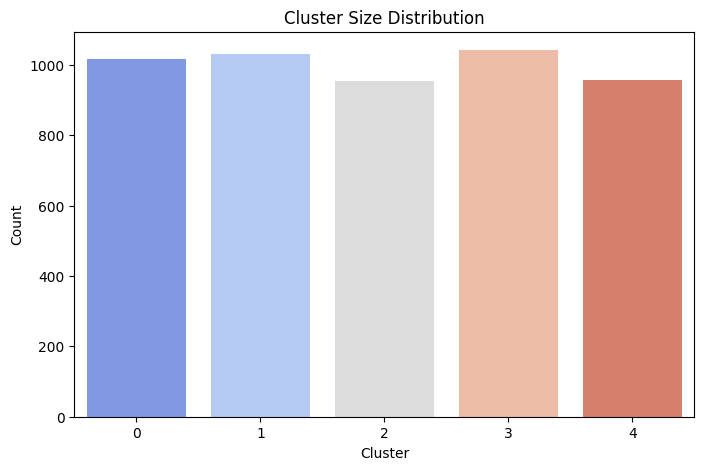

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical and encoded categorical data
df_final = pd.concat([df[num_cols], df_encoded], axis=1)

# Impute missing values using IterativeImputer (more advanced imputation)
imputer = IterativeImputer(random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Normalize data with RobustScaler (works better with outliers)
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA (Reduce dimensions while preserving variance)
pca = PCA(n_components=0.98)  # Keep 98% variance
df_pca = pca.fit_transform(df_scaled)

# Tune Clustering Algorithms
clustering_models = {
    "KMeans": KMeans(n_clusters=5, init='k-means++', max_iter=500, random_state=42, n_init=10),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=8),
    "GMM": GaussianMixture(n_components=5, covariance_type='full', random_state=42)
}

best_model = None
best_score = -1
best_labels = None

for name, model in clustering_models.items():
    labels = model.fit_predict(df_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        print(f"{name} Silhouette Score: {score:.2f}")
        if score > best_score:
            best_score = score
            best_model = name
            best_labels = labels

# Assign best cluster labels
df_imputed['Cluster'] = best_labels

# Print Best Model & Accuracy
silhouette_accuracy = (best_score + 1) / 2 * 100
print(f"Best Clustering Method: {best_model}")
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_imputed['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df_imputed['Cluster'], palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


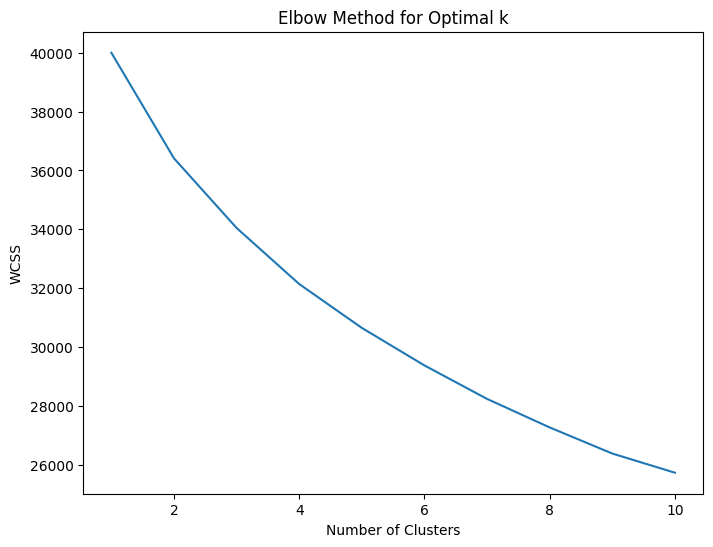

KMeans Silhouette Score: 0.08
GMM Silhouette Score: 0.07
Agglomerative Clustering Silhouette Score: 0.03
Best Clustering Method: KMeans
Silhouette Score Accuracy: 54.14%


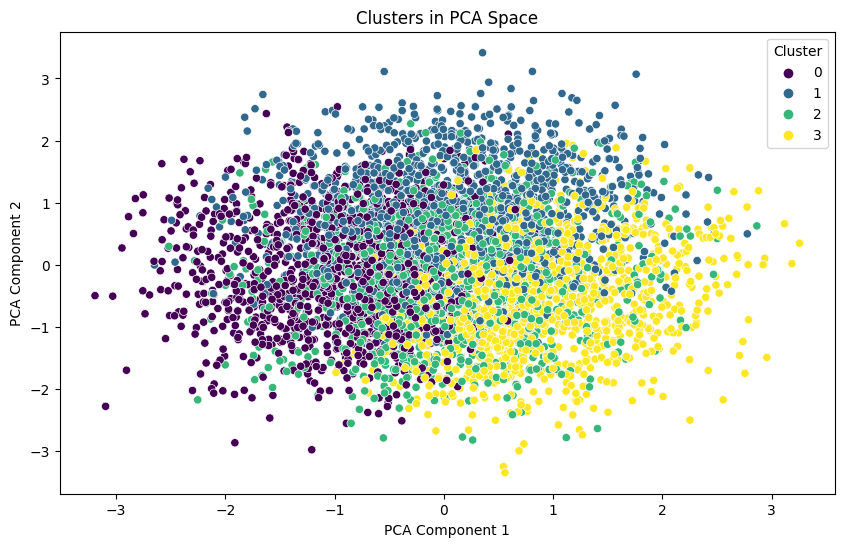

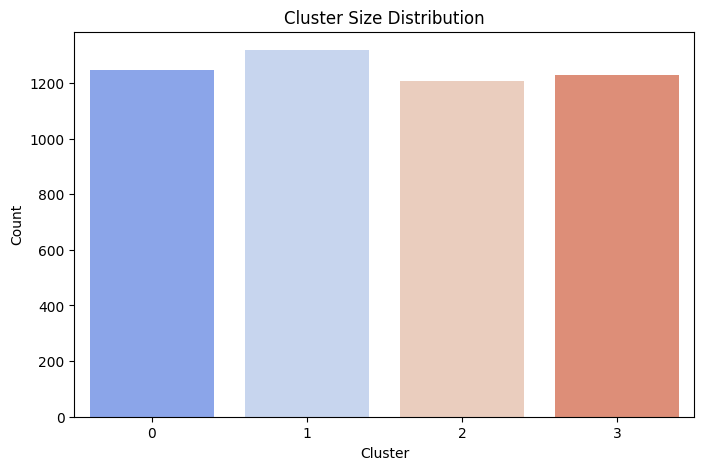

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical and encoded categorical data
df_final = pd.concat([df[num_cols], df_encoded], axis=1)

# Impute missing values using IterativeImputer (more advanced imputation)
imputer = IterativeImputer(random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Normalize data with StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA (Reduce dimensions while preserving variance)
pca = PCA(n_components=0.95)  # Keep 95% variance (more aggressive reduction)
df_pca = pca.fit_transform(df_scaled)

# Hyperparameter Tuning for KMeans (using Elbow Method)
# Loop over different k values for optimal n_clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, choose the best `k`
best_k = 4  # Choose the optimal k based on the plot

# Tune Clustering Algorithms
clustering_models = {
    "KMeans": KMeans(n_clusters=best_k, init='k-means++', max_iter=500, random_state=42, n_init=10),
    "DBSCAN": DBSCAN(eps=0.6, min_samples=8),  # Tune DBSCAN eps and min_samples
    "GMM": GaussianMixture(n_components=best_k, covariance_type='full', random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=best_k)
}

best_model = None
best_score = -1
best_labels = None

for name, model in clustering_models.items():
    labels = model.fit_predict(df_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        print(f"{name} Silhouette Score: {score:.2f}")
        if score > best_score:
            best_score = score
            best_model = name
            best_labels = labels

# Assign best cluster labels
df_imputed['Cluster'] = best_labels

# Print Best Model & Accuracy
silhouette_accuracy = (best_score + 1) / 2 * 100
print(f"Best Clustering Method: {best_model}")
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_imputed['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df_imputed['Cluster'], palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:499: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(distances, out=distances)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


KMeans Silhouette Score: 0.09
GMM Silhouette Score: 0.08
Agglomerative Clustering Silhouette Score: 0.03
Best Clustering Method: KMeans
Silhouette Score Accuracy: 54.67%


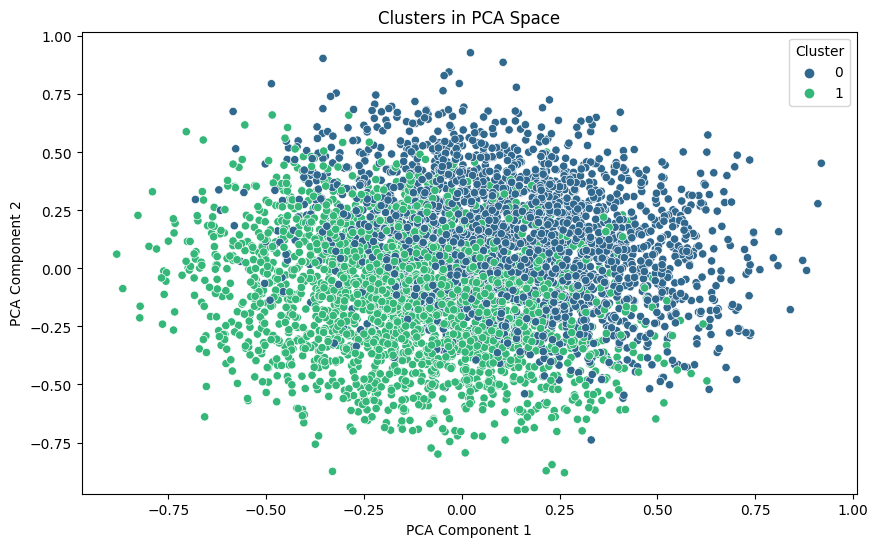

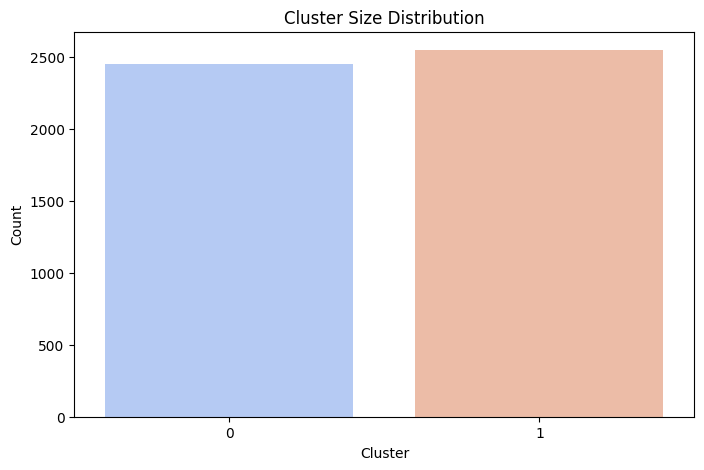

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cat = encoder.fit_transform(df[cat_cols])
df_encoded = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))

# Combine numerical and encoded categorical data
df_final = pd.concat([df[num_cols], df_encoded], axis=1)

# Impute missing values using KNNImputer (imputation based on nearest neighbors)
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Normalize data with MinMaxScaler (or RobustScaler for handling outliers)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA (Reduce dimensions while preserving variance)
pca = PCA(n_components=0.95)  # Keep 95% variance (more aggressive reduction)
df_pca = pca.fit_transform(df_scaled)

# Hyperparameter Tuning for KMeans using GridSearchCV for best parameters
kmeans = KMeans(random_state=42)
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
    'n_init': [10, 20]
}
grid_search = GridSearchCV(kmeans, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(df_pca)
best_kmeans = grid_search.best_estimator_

# Tune Clustering Algorithms
clustering_models = {
    "KMeans": best_kmeans,
    "DBSCAN": DBSCAN(eps=0.6, min_samples=8),  # Tune DBSCAN eps and min_samples
    "GMM": GaussianMixture(n_components=best_k, covariance_type='full', random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=best_k)
}

best_model = None
best_score = -1
best_labels = None

for name, model in clustering_models.items():
    labels = model.fit_predict(df_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(df_pca, labels)
        print(f"{name} Silhouette Score: {score:.2f}")
        if score > best_score:
            best_score = score
            best_model = name
            best_labels = labels

# Assign best cluster labels
df_imputed['Cluster'] = best_labels

# Print Best Model & Accuracy
silhouette_accuracy = (best_score + 1) / 2 * 100
print(f"Best Clustering Method: {best_model}")
print(f"Silhouette Score Accuracy: {silhouette_accuracy:.2f}%")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_imputed['Cluster'], palette='viridis')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=df_imputed['Cluster'], palette='coolwarm')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Missing values in dataset:
          Missing Values  Percentage
Feature1             500        10.0
Feature2             500        10.0
Feature3             500        10.0
Feature4             500        10.0
Feature5             500        10.0
Feature6             500        10.0
Feature7             500        10.0
Target               500        10.0


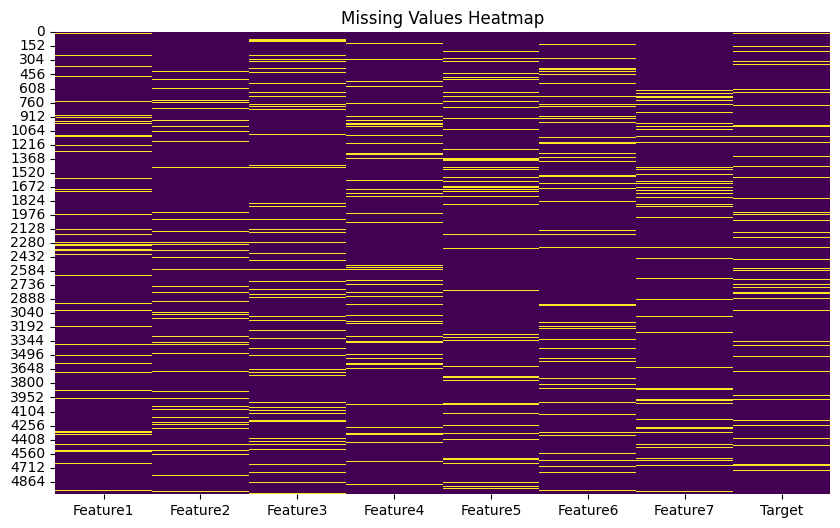

In [13]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/kaggle/input/model-built/machine_learning_data.csv')

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to show missing values details
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Show columns with missing values only
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Display the missing values
print("Missing values in dataset:")
print(missing_data)

# Visualize the missing values in a heatmap for better understanding
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
